# Data Collection

This notebook is a part of the replication package for my ICSE'22 paper.

Ever since the Apple App Store and Google Play Store prohibited automated API requests to collect app statistics, scraping all app reviews for a specific app has become nearly impossible. Fortunately, researchers and enthusiasts were able to figure out ways to still do that by exploiting the infinite scroll that web versions of the corresponding app stores provide. Such exploits are the cornerstone of third-party Python libraries, which are freely available for download and use.

In this notebook, I use [app_store_scraper](https://pypi.org/project/app-store-scraper/) to download app reviews from the Apple App Store and [google_play_scraper](https://pypi.org/project/google-play-scraper/) to download app reviews from Google Store respectively.

This notebook consists of the following sections:
- **App Selection**
- **App Review Collection**

## App Selection

To demonstrate the feasability of my approach, I selected two domains of apps for the analysis: **investing** and **food delivery**. Most popular apps (based on January 2021 data) were selected from both domains to make sure that enough reviews were available for the analysis. The selected apps are presented below.

In [2]:
investing_apps = ['Robinhood', 'Acorn', 'Stash', 'E*TRADE', 'Fidelity', 'TD Ameritrade', 'Schwab', 'Personal Capital']
food_delivery_apps = ['Uber Eats', 'DoorDash', 'Grubhub', 'Postmates', 'Seamless']

## App Review Collection

To illustrate the data collection process, I will collect app reviews for 2 apps. For the real analysis, this process was repeated for each app and each app store.

In [3]:
from app_store_scraper import AppStore
from google_play_scraper import reviews_all, Sort
from pprint import pprint
import pandas as pd

To use the Apple App Store scraper, all it needs is the app's name.

In [4]:
app_name = "Seamless"

rb = AppStore(country="us", app_name=app_name)
rb.review(sleep=1) # sleep is added to avoid ip lock

2021-11-28 16:52:29,782 [INFO] Base - Searching for app id
2021-11-28 16:52:31,580 [INFO] Base - Initialised: AppStore('us', 'seamless', 381840917)
2021-11-28 16:52:31,581 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/us/app/seamless/id381840917
2021-11-28 16:52:37,522 [INFO] Base - [id:381840917] Fetched 100 reviews (100 fetched in total)
2021-11-28 16:52:44,649 [INFO] Base - [id:381840917] Fetched 220 reviews (220 fetched in total)
2021-11-28 16:52:51,939 [INFO] Base - [id:381840917] Fetched 340 reviews (340 fetched in total)
2021-11-28 16:52:59,202 [INFO] Base - [id:381840917] Fetched 460 reviews (460 fetched in total)
2021-11-28 16:53:06,463 [INFO] Base - [id:381840917] Fetched 580 reviews (580 fetched in total)
2021-11-28 16:53:13,717 [INFO] Base - [id:381840917] Fetched 700 reviews (700 fetched in total)
2021-11-28 16:53:20,938 [INFO] Base - [id:381840917] Fetched 820 reviews (820 fetched in total)
2021-11-28 16:53:28,252 [INFO] Base - [id:381840917] Fetched 9

2021-11-28 17:02:29,289 [INFO] Base - [id:381840917] Fetched 9860 reviews (9860 fetched in total)
2021-11-28 17:02:36,482 [INFO] Base - [id:381840917] Fetched 9980 reviews (9980 fetched in total)
2021-11-28 17:02:43,680 [INFO] Base - [id:381840917] Fetched 10100 reviews (10100 fetched in total)
2021-11-28 17:02:50,874 [INFO] Base - [id:381840917] Fetched 10220 reviews (10220 fetched in total)
2021-11-28 17:02:58,063 [INFO] Base - [id:381840917] Fetched 10340 reviews (10340 fetched in total)
2021-11-28 17:03:05,274 [INFO] Base - [id:381840917] Fetched 10460 reviews (10460 fetched in total)
2021-11-28 17:03:12,421 [INFO] Base - [id:381840917] Fetched 10580 reviews (10580 fetched in total)
2021-11-28 17:03:19,640 [INFO] Base - [id:381840917] Fetched 10700 reviews (10700 fetched in total)
2021-11-28 17:03:26,776 [INFO] Base - [id:381840917] Fetched 10820 reviews (10820 fetched in total)
2021-11-28 17:03:33,982 [INFO] Base - [id:381840917] Fetched 10940 reviews (10940 fetched in total)
2021

To make sure that indeed all reviews have been collected for a given app I create a date histogram

2010-07-18 16:14:00


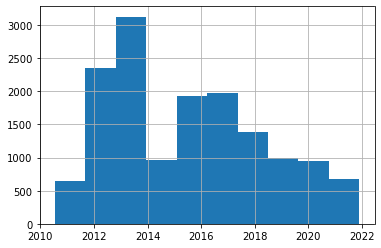

In [6]:
data = pd.DataFrame(rb.reviews)
data.date.hist()
print(data.date.min())

As shown, the earliest review dates back to 2010

Each app's reviews can be exported as a csv using pandas

In [ ]:
data.to_csv(f'{app_name}_apple.csv')

Google Play scrapper uses a different syntax. It requires the id of the app

In [7]:
result = reviews_all(
    'com.personalcapital.pcapandroid',
    lang='en', # defaults to 'en'
    country='us', # defaults to 'us'
    sort=Sort.NEWEST, # defaults to Sort.MOST_RELEVANT
    count=200, # defaults to 100
    #filter_score_with=5 # defaults to None(means all score)
    sleep_milliseconds=1000,
)

Here is a breakdown of the review timeline by score

2021-11-28 17:11:19,981 [INFO] numexpr.utils - NumExpr defaulting to 8 threads.


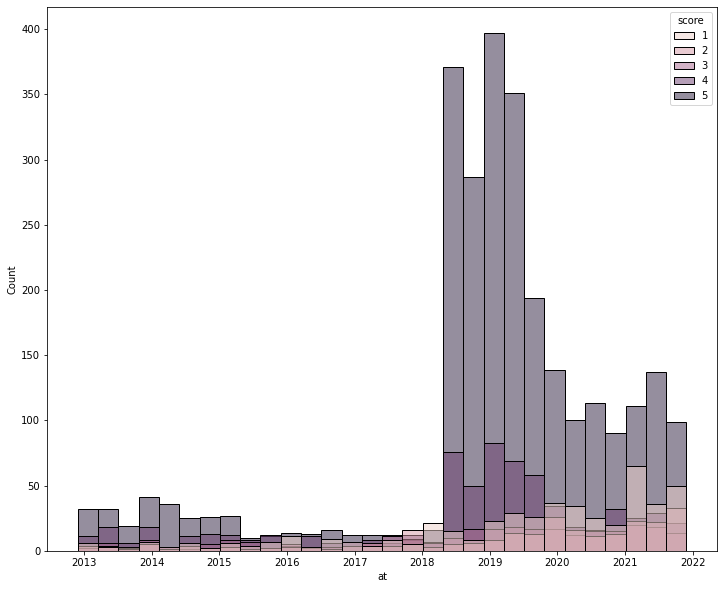

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,10))
sns.histplot(data=pd.DataFrame(result), x='at', bins=30, hue='score')